# Clustering comparison

In [1]:
import signal_ana as ana
import pandas as pd
%load_ext autoreload
%autoreload 2

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
use_wf = True
use_lpc = False
use_amp = False

In [4]:
# Load the signals
df = ana.load_signals('/eos/user/l/llayer/features_30.h5')

In [5]:
# Exclude the eruption days
eruption_days = [ ('2019-07-03', '2019-07-04'), ('2019-08-28', '2019-08-29'), ('2019-08-29', '2019-08-30')]
df = ana.exclude_days(df, eruption_days)

In [6]:
features_wf = ana.get_features(df, 'waveform')
features_lpc = ana.get_features(df, 'lpc_coeff')
features_amp = ana.get_features(df, 'amplitude')

## 1. Filtered signal

### t-SNE 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19748 samples in 0.195s...
[t-SNE] Computed neighbors for 19748 samples in 138.437s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19748
[t-SNE] Computed conditional probabilities for sample 2000 / 19748
[t-SNE] Computed conditional probabilities for sample 3000 / 19748
[t-SNE] Computed conditional probabilities for sample 4000 / 19748
[t-SNE] Computed conditional probabilities for sample 5000 / 19748
[t-SNE] Computed conditional probabilities for sample 6000 / 19748
[t-SNE] Computed conditional probabilities for sample 7000 / 19748
[t-SNE] Computed conditional probabilities for sample 8000 / 19748
[t-SNE] Computed conditional probabilities for sample 9000 / 19748
[t-SNE] Computed conditional probabilities for sample 10000 / 19748
[t-SNE] Computed conditional probabilities for sample 11000 / 19748
[t-SNE] Computed conditional probabilities for sample 12000 / 19748
[t-SNE] Computed conditional probabilities for 

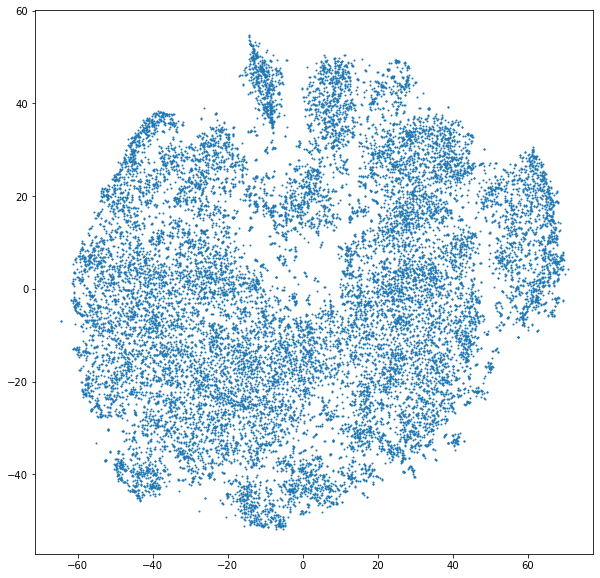

In [7]:
tsne_x, tsne_y = ana.run_tsne(features_wf, perplexity=50)
df['tsne_x'] = tsne_x
df['tsne_y'] = tsne_y

In [20]:
tsne_wf = df[['time', 'tsne_x', 'tsne_y']]

In [22]:
tsne_wf.to_hdf('tsne_wf.h5', 'frame')

### SOM 25 x 25

In [14]:
from skopt.space import Real, Categorical, Integer

# Train som
size_x = 25
size_y = 25
niter = 59000 #10000
sigma = 2.2 # #0.3
learning_rate= .013 #.5
pca=False
random_seed = 2

# Skopt dimensions
skopt_dims = [       
    Real(        low=1e-2, high=1,     prior='log-uniform', name='learning_rate'     ),
    Real(        low=.1,    high=5,                         name='sigma'     ),
    Real(     low=1e2,    high=1e5,   prior='log-uniform', name='niter'       )
]

# Initial parameters
init_param = {'learning_rate':0.5, 'sigma':0.3, 'niter' : 10000}

search_result = ana.optimize(skopt_dims, init_param, features_wf, size_x, size_y,
                             num_calls=50, pca = pca, random_seed = random_seed)

learning_rate
sigma
niter

 	 ::: 1 SKOPT CALL ::: 

{'learning_rate': 0.5, 'sigma': 0.3, 'niter': 10000}
0.317105777733
0.0280534737695
0.31834426594870724

 	 ::: 5 SKOPT CALL ::: 

{'learning_rate': 0.98923731135154302, 'sigma': 4.2896095739820472, 'niter': 127.67749789698733}
0.266135183335
0.0390925663358
0.2689910120271296

 	 ::: 7 SKOPT CALL ::: 

{'learning_rate': 0.0545179970085223, 'sigma': 1.7723569323567887, 'niter': 258.08790437897505}
0.259114753253
0.979542232125
1.0132341485902991

 	 ::: 8 SKOPT CALL ::: 

{'learning_rate': 0.42247674710376626, 'sigma': 2.6698870195095812, 'niter': 224.95468148958417}
0.47886749149
0.259975693741
0.544886626503703

 	 ::: 9 SKOPT CALL ::: 

{'learning_rate': 0.050005155354368676, 'sigma': 2.7533525737430855, 'niter': 657.5198966719222}
0.38874110592
0.873151711566
0.9557790324348379

 	 ::: 10 SKOPT CALL ::: 

{'learning_rate': 0.035906978398724206, 'sigma': 4.3769968839537423, 'niter': 2819.9650667710825}
0.424905203746
0.01367227060

/eos/user/l/llayer/.local/lib/python3.6/site-packages/minisom.py:410: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


0.262823066266
0.945817297954
0.9816548911256031

 	 ::: 22 SKOPT CALL ::: 

{'learning_rate': 0.053753433160297286, 'sigma': 1.347130849529685, 'niter': 26566.404798471751}
0.251374097974
0.0767672675714
0.26283483502503824

 	 ::: 23 SKOPT CALL ::: 

{'learning_rate': 0.12984214731208127, 'sigma': 3.0190036724977012, 'niter': 69709.396171553555}
0.304959544202
0.0208122341503
0.30566889388728125

 	 ::: 24 SKOPT CALL ::: 

{'learning_rate': 0.010143488561644869, 'sigma': 3.61785831056083, 'niter': 20862.451409239817}
0.35331678253
0.00597528863682
0.35336730591746746

 	 ::: 25 SKOPT CALL ::: 

{'learning_rate': 0.71252783545931231, 'sigma': 2.4985839590287449, 'niter': 49789.673421266009}
0.290579283089
0.0594996961718
0.29660838424616437

 	 ::: 26 SKOPT CALL ::: 

{'learning_rate': 0.22510675323392565, 'sigma': 5.0, 'niter': 100000.0}
0.366842480083
0.00688677334414
0.3669071174573979

 	 ::: 27 SKOPT CALL ::: 

{'learning_rate': 0.26877751937033184, 'sigma': 4.0346388462662572, '

In [17]:
search_result.to_hdf('som_skopt_wf.h5', 'frame')

## 2. LPC and Amplitude

In [ ]:
lpc_amp = np.concatenate((features_lpc, features_amp),axis=1)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19748 samples in 0.085s...
[t-SNE] Computed neighbors for 19748 samples in 72.605s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19748
[t-SNE] Computed conditional probabilities for sample 2000 / 19748
[t-SNE] Computed conditional probabilities for sample 3000 / 19748
[t-SNE] Computed conditional probabilities for sample 4000 / 19748
[t-SNE] Computed conditional probabilities for sample 5000 / 19748
[t-SNE] Computed conditional probabilities for sample 6000 / 19748
[t-SNE] Computed conditional probabilities for sample 7000 / 19748
[t-SNE] Computed conditional probabilities for sample 8000 / 19748
[t-SNE] Computed conditional probabilities for sample 9000 / 19748
[t-SNE] Computed conditional probabilities for sample 10000 / 19748
[t-SNE] Computed conditional probabilities for sample 11000 / 19748
[t-SNE] Computed conditional probabilities for sample 12000 / 19748
[t-SNE] Computed conditional probabilities for s

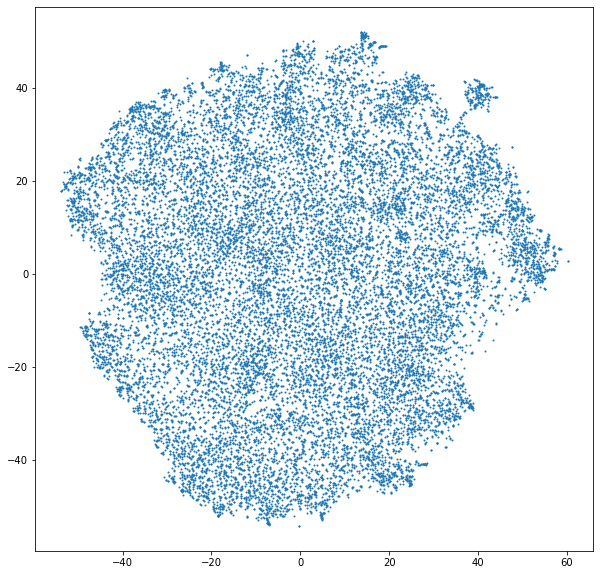

In [23]:
tsne_x, tsne_y = ana.run_tsne(lpc_amp, perplexity=50)
df['tsne_x'] = tsne_x
df['tsne_y'] = tsne_y

In [ ]:
from skopt.space import Real, Categorical, Integer

# Train som
size_x = 25
size_y = 25
niter = 59000 #10000
sigma = 2.2 # #0.3
learning_rate= .013 #.5
pca=False
random_seed = 2

# Skopt dimensions
skopt_dims = [       
    Real(        low=1e-2, high=1,     prior='log-uniform', name='learning_rate'     ),
    Real(        low=.1,    high=5,                         name='sigma'     ),
    Real(     low=1e2,    high=1e5,   prior='log-uniform', name='niter'       )
]

# Initial parameters
init_param = {'learning_rate':0.5, 'sigma':0.3, 'niter' : 10000}

search_result_lpc = ana.optimize(skopt_dims, init_param, lpc_amp, size_x, size_y,
                             num_calls=50, pca = pca, random_seed = random_seed)

learning_rate
sigma
niter

 	 ::: 1 SKOPT CALL ::: 

{'learning_rate': 0.5, 'sigma': 0.3, 'niter': 10000}
0.0784403856033
0.972807372899
0.9759646913999092

 	 ::: 2 SKOPT CALL ::: 

{'learning_rate': 0.017459338348774098, 'sigma': 0.27391510473816572, 'niter': 287.01860969263373}


/eos/user/l/llayer/.local/lib/python3.6/site-packages/minisom.py:410: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


0.1016928836
0.992860036459
0.9980543545183636

 	 ::: 3 SKOPT CALL ::: 

{'learning_rate': 0.25721236424675092, 'sigma': 1.208886369837024, 'niter': 17789.018687006654}
0.0815690713373
0.150445614746
0.17113560820319343

 	 ::: 4 SKOPT CALL ::: 

{'learning_rate': 0.11468706873200291, 'sigma': 3.6067578197705421, 'niter': 3350.7994970098953}
0.118306748436
0.0117986631558
0.11889362967655628

 	 ::: 5 SKOPT CALL ::: 

{'learning_rate': 0.84867157006299077, 'sigma': 4.6403984791467394, 'niter': 1542.2571648982498}
0.148083449663
0.0422321247721
0.15398785805010595

 	 ::: 6 SKOPT CALL ::: 

{'learning_rate': 0.020239751430618055, 'sigma': 4.8900425283242912, 'niter': 1222.8443455973688}
0.158786556743
0.761191006684
0.7775763108912133

 	 ::: 7 SKOPT CALL ::: 

{'learning_rate': 0.18559545438000255, 'sigma': 3.0854877610026969, 'niter': 1683.5820832440925}
0.126412609599
0.0193437310107
0.12788404042340873

 	 ::: 8 SKOPT CALL ::: 

{'learning_rate': 0.23741311113322774, 'sigma': 4.882

/eos/user/l/llayer/.local/lib/python3.6/site-packages/minisom.py:410: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


0.101498762723
0.992606846263
0.9977827168688982

 	 ::: 14 SKOPT CALL ::: 

{'learning_rate': 0.18245362160379075, 'sigma': 2.7558255786187855, 'niter': 15288.961765859165}
0.10016745069
0.0273951792587
0.10384610741064959

 	 ::: 15 SKOPT CALL ::: 

{'learning_rate': 0.12095637696828263, 'sigma': 5.0, 'niter': 100000.0}


In [ ]:
search_result.to_hdf('som_skopt_lpcamp.h5', 'frame')

## 3. Combination

In [ ]:
full = np.concatenate((features_wf, features_lpc, features_amp),axis=1)

In [ ]:
tsne_x, tsne_y = ana.run_tsne(full, perplexity=50)
df['tsne_x'] = tsne_x
df['tsne_y'] = tsne_y

In [ ]:
from skopt.space import Real, Categorical, Integer

# Train som
size_x = 25
size_y = 25
niter = 59000 #10000
sigma = 2.2 # #0.3
learning_rate= .013 #.5
pca=False
random_seed = 2

# Skopt dimensions
skopt_dims = [       
    Real(        low=1e-2, high=1,     prior='log-uniform', name='learning_rate'     ),
    Real(        low=.1,    high=5,                         name='sigma'     ),
    Real(     low=1e2,    high=1e5,   prior='log-uniform', name='niter'       )
]

# Initial parameters
init_param = {'learning_rate':0.5, 'sigma':0.3, 'niter' : 10000}

search_result_full = ana.optimize(skopt_dims, init_param, full, size_x, size_y,
                             num_calls=50, pca = pca, random_seed = random_seed)

In [ ]:
search_result.to_hdf('som_skopt_full.h5', 'frame')

## 4. Dense autoencoder 300

In [10]:
dense_300 = pd.read_hdf('dense_300.h5')

In [6]:
feat_300 = dense_300.drop(['time'], axis=1).values

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19748 samples in 0.515s...
[t-SNE] Computed neighbors for 19748 samples in 247.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19748
[t-SNE] Computed conditional probabilities for sample 2000 / 19748
[t-SNE] Computed conditional probabilities for sample 3000 / 19748
[t-SNE] Computed conditional probabilities for sample 4000 / 19748
[t-SNE] Computed conditional probabilities for sample 5000 / 19748
[t-SNE] Computed conditional probabilities for sample 6000 / 19748
[t-SNE] Computed conditional probabilities for sample 7000 / 19748
[t-SNE] Computed conditional probabilities for sample 8000 / 19748
[t-SNE] Computed conditional probabilities for sample 9000 / 19748
[t-SNE] Computed conditional probabilities for sample 10000 / 19748
[t-SNE] Computed conditional probabilities for sample 11000 / 19748
[t-SNE] Computed conditional probabilities for sample 12000 / 19748
[t-SNE] Computed conditional probabilities for 

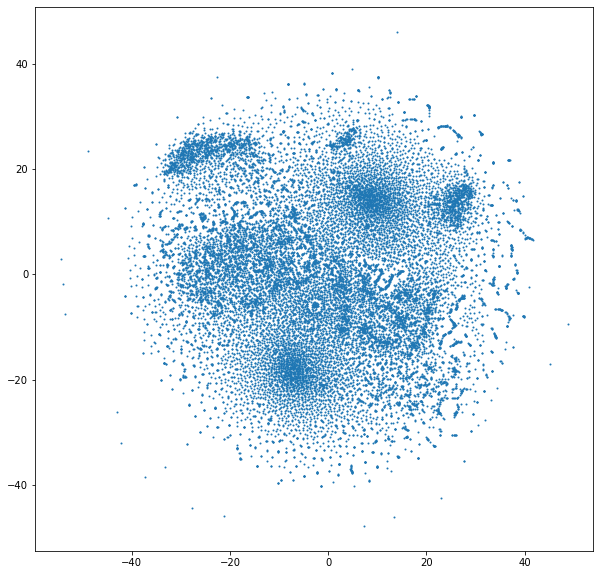

In [7]:
tsne_x, tsne_y = ana.run_tsne(feat_300, perplexity=50)

In [11]:
dense_300['tsne_x'], dense_300['tsne_y'] = tsne_x, tsne_y

In [12]:
dense_300.to_hdf('tsne_dense300.h5', 'frame')

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/io/pytables.py:274: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  f(store)
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/io/pytables.py:274: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  f(store)
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['time']]

  return pytables.to_hdf(path_or_buf, key, self, **kw

## 5. Dense 200

In [14]:
dense_200 = pd.read_hdf('dense_200.h5')
feat_200 = dense_200.drop(['time'], axis=1).values

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19748 samples in 0.297s...
[t-SNE] Computed neighbors for 19748 samples in 187.783s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19748
[t-SNE] Computed conditional probabilities for sample 2000 / 19748
[t-SNE] Computed conditional probabilities for sample 3000 / 19748
[t-SNE] Computed conditional probabilities for sample 4000 / 19748
[t-SNE] Computed conditional probabilities for sample 5000 / 19748
[t-SNE] Computed conditional probabilities for sample 6000 / 19748
[t-SNE] Computed conditional probabilities for sample 7000 / 19748
[t-SNE] Computed conditional probabilities for sample 8000 / 19748
[t-SNE] Computed conditional probabilities for sample 9000 / 19748
[t-SNE] Computed conditional probabilities for sample 10000 / 19748
[t-SNE] Computed conditional probabilities for sample 11000 / 19748
[t-SNE] Computed conditional probabilities for sample 12000 / 19748
[t-SNE] Computed conditional probabilities for 

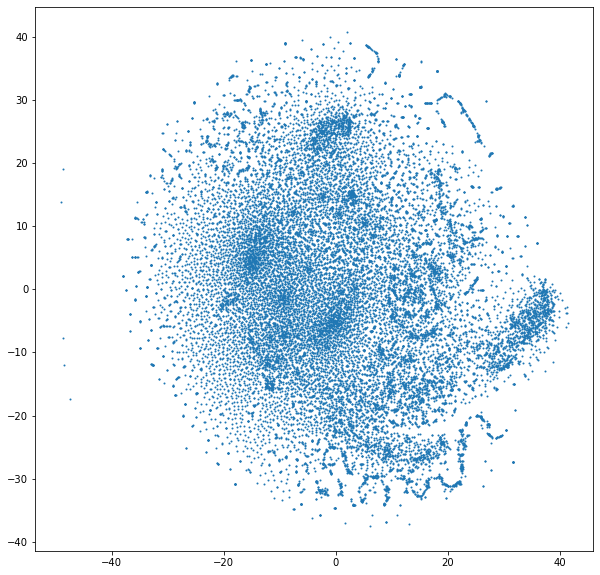

In [16]:
tsne_x, tsne_y = ana.run_tsne(feat_200, perplexity=50)
dense_200['tsne_x'], dense_200['tsne_y'] = tsne_x, tsne_y

In [ ]:
dense_200.to_hdf('tsne_dense200.h5', 'frame')

## 6. Dense 100

In [18]:
dense_100 = pd.read_hdf('dense_100.h5')
feat_100 = dense_100.drop(['time'], axis=1).values

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19748 samples in 0.137s...
[t-SNE] Computed neighbors for 19748 samples in 94.963s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19748
[t-SNE] Computed conditional probabilities for sample 2000 / 19748
[t-SNE] Computed conditional probabilities for sample 3000 / 19748
[t-SNE] Computed conditional probabilities for sample 4000 / 19748
[t-SNE] Computed conditional probabilities for sample 5000 / 19748
[t-SNE] Computed conditional probabilities for sample 6000 / 19748
[t-SNE] Computed conditional probabilities for sample 7000 / 19748
[t-SNE] Computed conditional probabilities for sample 8000 / 19748
[t-SNE] Computed conditional probabilities for sample 9000 / 19748
[t-SNE] Computed conditional probabilities for sample 10000 / 19748
[t-SNE] Computed conditional probabilities for sample 11000 / 19748
[t-SNE] Computed conditional probabilities for sample 12000 / 19748
[t-SNE] Computed conditional probabilities for s

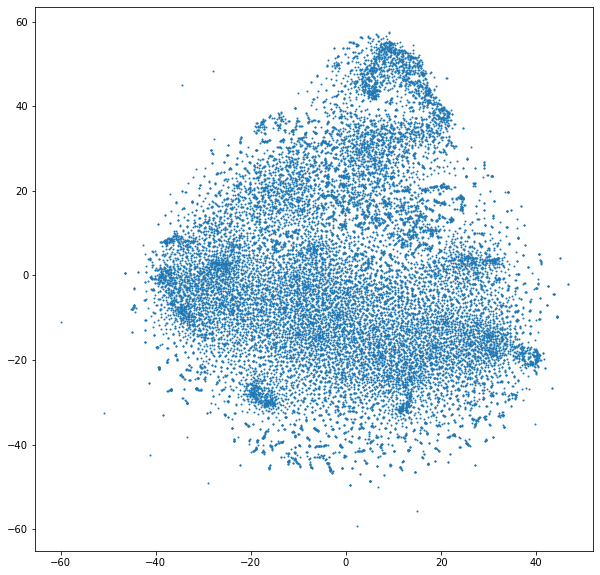

In [19]:
tsne_x, tsne_y = ana.run_tsne(feat_100, perplexity=50)
dense_100['tsne_x'], dense_100['tsne_y'] = tsne_x, tsne_y

In [20]:
dense_100.to_hdf('tsne_dense100.h5', 'frame')

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/io/pytables.py:274: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  f(store)
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/io/pytables.py:274: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  f(store)
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['time']]

  return pytables.to_hdf(path_or_buf, key, self, **kw

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19748 samples in 0.402s...
[t-SNE] Computed neighbors for 19748 samples in 143.471s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19748
[t-SNE] Computed conditional probabilities for sample 2000 / 19748
[t-SNE] Computed conditional probabilities for sample 3000 / 19748
[t-SNE] Computed conditional probabilities for sample 4000 / 19748
[t-SNE] Computed conditional probabilities for sample 5000 / 19748
[t-SNE] Computed conditional probabilities for sample 6000 / 19748
[t-SNE] Computed conditional probabilities for sample 7000 / 19748
[t-SNE] Computed conditional probabilities for sample 8000 / 19748
[t-SNE] Computed conditional probabilities for sample 9000 / 19748
[t-SNE] Computed conditional probabilities for sample 10000 / 19748
[t-SNE] Computed conditional probabilities for sample 11000 / 19748
[t-SNE] Computed conditional probabilities for sample 12000 / 19748
[t-SNE] Computed conditional probabilities for 

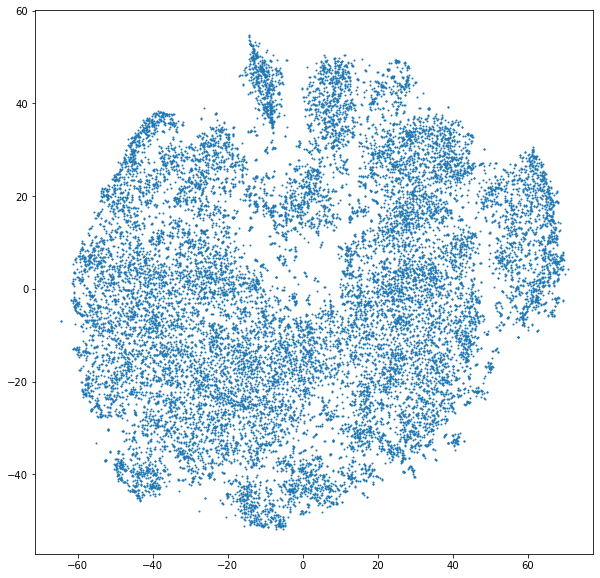

In [51]:
tsne_x, tsne_y = ana.run_tsne(features, perplexity=50)
df['tsne_x'] = tsne_x
df['tsne_y'] = tsne_y

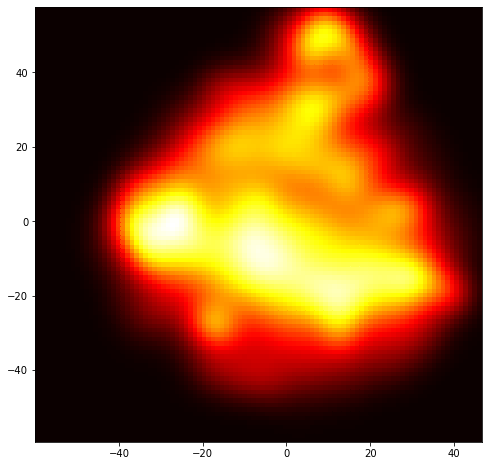

In [21]:
from scipy.stats import kde
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

cmap=plt.get_cmap('hot')

#x, y = df['tsne_x'], df['tsne_y']
x, y = tsne_x, tsne_y

k = kde.gaussian_kde([x,y])
bins_y = 100
bins_x = 100
xi, yi = np.mgrid[x.min():x.max():bins_x*1j, y.min():y.max():bins_y*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# Make the plot
fig, ax = plt.subplots(figsize=(8,8))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap = cmap)

plt.show()

In [36]:
# Run kmeans
n_cluster = 2
df['kmeans'] = ana.run_kmeans(features, n_cluster)

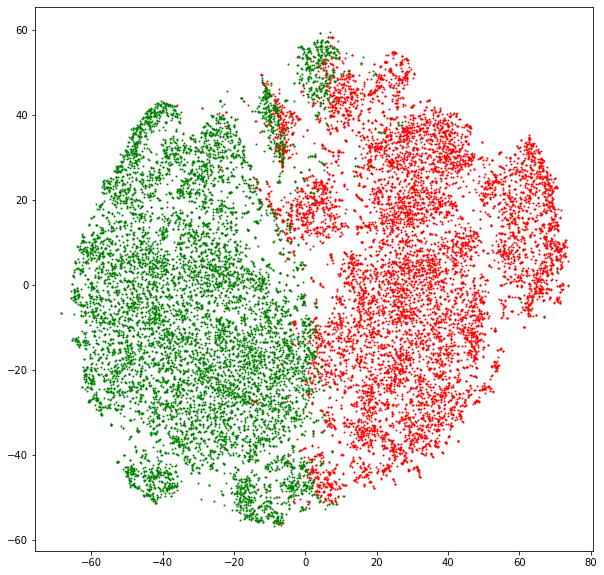

In [37]:
ana.plot_kmeans_tsne(df, 'kmeans', n_cluster, plot_avg=False)

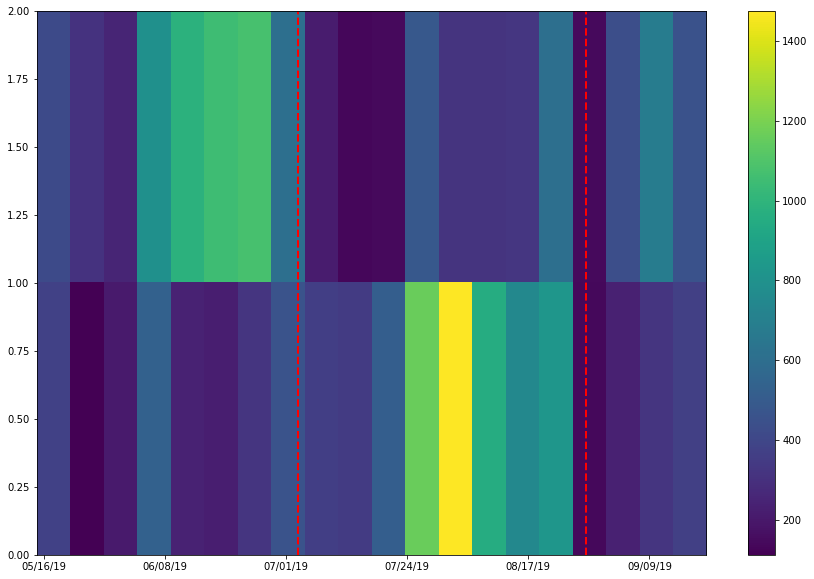

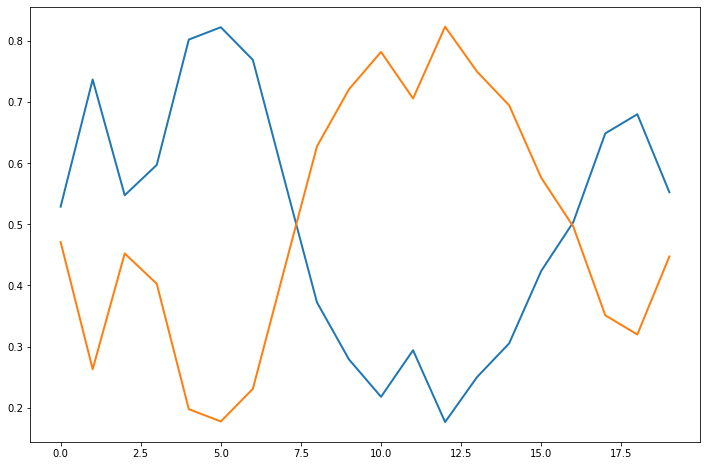

In [38]:
ana.plot_hist2d(df, 'kmeans', n_cluster, timebins=20)

In [6]:
import numpy as np
from matplotlib import cm
from datetime import datetime, date
import pandas as pd
import matplotlib.pyplot as plt

def plot_hist2d(df, col, n_clusters, timebins=200, plot_hist = True):

    df['time_int'] = df.time.astype(np.int64)
    x, y = df['time_int'], df[col]

    heatmap, xedges, yedges = np.histogram2d(x, y, bins=(timebins, n_clusters))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]+1]
    err1, err2 = ana.get_erruption_time()


    # 2d histo
    if plot_hist == True:
        fig = plt.figure(1, figsize=(15, 10))
        ax = fig.add_subplot(111)
        plt.imshow(heatmap.T, extent=extent, aspect='auto', interpolation = 'nearest')

        ax.axvline(x=err1, color='r', linestyle='dashed', linewidth=2)
        ax.axvline(x=err2, color='r', linestyle='dashed', linewidth=2)
        ax.set_xticklabels([datetime.fromtimestamp(ts / 1e9).strftime('%D') for ts in ax.get_xticks()])
        locs, labels = plt.xticks()
        print( locs, labels )
        plt.colorbar()
        plt.show()

    # Fractions in bin
    frac_per_bin = []
    frac_per_bin_err = []
    for b in heatmap:
        fraction = []
        fraction_err = []
        for cluster in b:
            if sum(b) > 0:
                
                
                
                fraction.append(float(cluster) / float(sum(b)))
                err_cluster = np.sqrt(float(cluster))
                err_tot = np.sqrt(float(sum(b)))
                delta_err_cls = err_cluster / float(cluster)
                delta_err_tot = err_tot / float(sum(b))
                err = np.sqrt(delta_err_cls*delta_err_cls + delta_err_tot*delta_err_tot)                
                fraction_err.append(err)
            else:
                fraction.append(0.)
                fraction_err.append(0.)
        frac_per_bin.append(fraction)
        frac_per_bin_err.append(fraction_err)
    
    fig = plt.figure(1, figsize=(8, 6), dpi=80)
    ax = fig.add_subplot(111)
    frac_per_bin = np.array(frac_per_bin)
    frac_per_bin_err = np.array(frac_per_bin_err)
    for i in range(frac_per_bin.shape[1]):
        vec = frac_per_bin[:,i]
        vec_err = frac_per_bin_err[:,i]
        #plt.plot(vec, linewidth=2)
        plt.errorbar(range(len(vec)), vec, yerr=vec_err)
    loc, label = locs[1:-1], labels[1:-1]
    tick_pos = range(len(label))
    tick_pos = [t * (timebins/float(len(label))) for t in tick_pos]
    plt.xticks(tick_pos, label)
    plt.show()
    


In [7]:
plot_hist2d(df, 'kmeans', n_cluster, timebins=20)

NameError: name 'n_cluster' is not defined

In [6]:
from tslearn.utils import to_time_series_dataset

In [7]:
tslearn_data = to_time_series_dataset(features)

In [8]:
from tslearn.clustering import TimeSeriesKMeans

In [14]:
n_cluster = 2
df['kmeans']  = TimeSeriesKMeans(n_clusters=n_cluster, metric="euclidean", max_iter=5, 
                                 random_state=0).fit_predict(tslearn_data)

[  1.55600000e+18   1.55800000e+18   1.56000000e+18   1.56200000e+18
   1.56400000e+18   1.56600000e+18   1.56800000e+18   1.57000000e+18] <a list of 8 Text xticklabel objects>


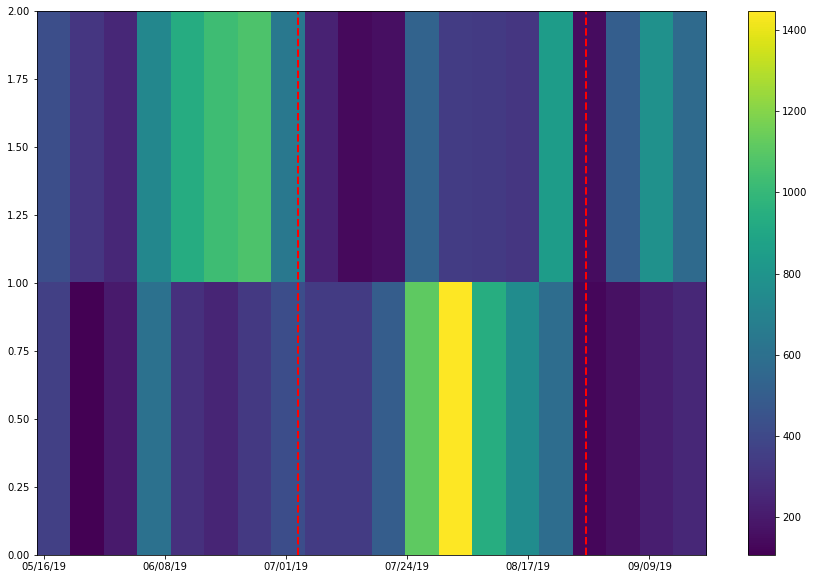

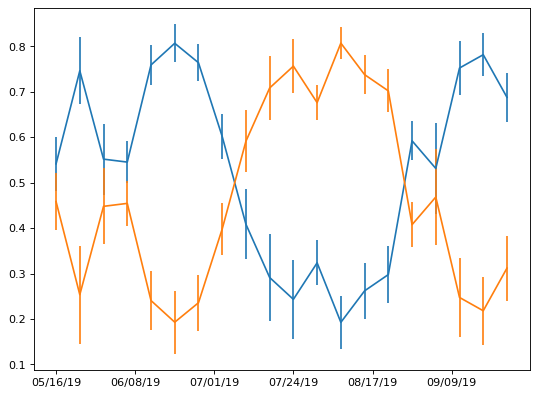

In [15]:
plot_hist2d(df, 'kmeans', n_cluster, timebins=20)

In [ ]:
res  = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=1, max_iter_barycenter=2,
                random_state=0, n_jobs=-1, verbose=1).fit(tslearn_data[0:10000])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

101057672.089 --> 

In [17]:
res

array([1, 0, 1, ..., 1, 1, 1])